In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# halo mod dependencies

In [2]:
import halomod
import hmf
from halomod import halo_model
from astropy.cosmology import Planck18
from hmf.halos import mass_definitions

from halomod.concentration import Duffy08
from halomod.concentration import GrowthFactor
from halomod.profiles import NFW


import halomod
import hmf
from halomod import TracerHaloModel
from astropy.cosmology import Planck18
from hmf.halos import mass_definitions
from halomod.halo_model import DMHaloModel

## Global parameters

In [3]:
halo_min = 30000
halo_max = 31000
z=2
b = 15
particle_mass = 2109081520.453063
SOdensityL1 = 208.4022045135498
file_dir = f'/Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z{z}/'

# Halo informations

In [4]:
def halo_info(halo_min,halo_max,file_dir):
    so_central_X = []
    so_central_Y = []
    so_central_Z = []
    x_L2com_X = []
    x_L2com_Y = []
    x_L2com_Z = []
    particle_number = []
    so_radius = []
    r100=[]


    file_paths = glob.glob(os.path.join(file_dir,'halo_info','*halo_info_*.csv'))
    file_paths.sort()
    for file_path in file_paths:
        print("Processing Halo info:", file_path)
        halos = pd.read_csv(file_path)
        N = halos['N']
        indices =[]
        for Ni in N:
            if halo_min <= Ni <= halo_max:
                index = N[N==Ni].index.to_list()
                indices.extend(index)
        for indx in indices:
            so_central_X.append(halos['SO_central_particle_X'][indx])
            so_central_Y.append(halos['SO_central_particle_Y'][indx])
            so_central_Z.append(halos['SO_central_particle_Z'][indx])
            x_L2com_X.append(halos['x_L2com_X'][indx])
            x_L2com_Y.append(halos['x_L2com_Y'][indx])
            x_L2com_Z.append(halos['x_L2com_Z'][indx])
            particle_number.append(halos['N'][indx])
            so_radius.append(halos['SO_radius'][indx])
            r100.append(halos['r100_L2com'][indx])
        del indices
    return so_central_X,so_central_Y,so_central_Z,x_L2com_X,x_L2com_Y,x_L2com_Z,particle_number,so_radius, r100

In [5]:
so_central_X, so_central_Y, so_central_Z, x_L2com_X, x_L2com_Y, x_L2com_Z, particle_number,so_radius, r100 = halo_info(halo_min,halo_max,file_dir)

Processing Halo info: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/halo_info/halo_info_000.csv
Processing Halo info: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/halo_info/halo_info_001.csv
Processing Halo info: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/halo_info/halo_info_002.csv
Processing Halo info: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/halo_info/halo_info_003.csv
Processing Halo info: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/halo_info/halo_info_004.csv
Processing Halo info: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/halo_info/halo_info_005.csv
Processing Halo info: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/halo_info/hal

# Subsample Data

In [6]:
def subsample_data(halo_min, halo_max, file_dir):
    particle_range = f'{halo_min}-{halo_max}'
    print(particle_range)
    outer_list = []
    
    file_paths = glob.glob(os.path.join(file_dir, '**', '**', f'*{particle_range}*','*halo_info_*.csv'))
    file_paths.sort()
    print("Total file paths:", len(file_paths))
    
    for file_path in file_paths:
        print("Processing file:", file_path)
        subsamples = pd.read_csv(file_path)

        Subsample_A_X = subsamples['Subsample_A_X']
        Subsample_A_Y = subsamples['Subsample_A_Y']
        Subsample_A_Z = subsamples['Subsample_A_Z']
        
        Subsample_B_X = subsamples['Subsample_B_X']
        Subsample_B_Y = subsamples['Subsample_B_Y']
        Subsample_B_Z = subsamples['Subsample_B_Z']
        
        Subsample_X = np.vstack((Subsample_A_X, Subsample_B_X))
        Subsample_Y = np.vstack((Subsample_A_Y, Subsample_B_Y))
        Subsample_Z = np.vstack((Subsample_A_Z, Subsample_B_Z))

        x = [number for array in Subsample_X for number in array if not np.isnan(number)]
        y = [number for array in Subsample_Y for number in array if not np.isnan(number)]
        z = [number for array in Subsample_Z for number in array if not np.isnan(number)]

        outer_list.append((x, y, z))
        
        
    print("Total unique file locations processed:", len(outer_list))
    return outer_list

In [7]:
X_Y_Z_lists = subsample_data(halo_min, halo_max, file_dir)

30000-31000
Total file paths: 23
Processing file: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/subsample data/averaging/30000-31000/halo_info_000_3408220002004000_subsample_data_30286.csv
Processing file: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/subsample data/averaging/30000-31000/halo_info_000_4405820536003000_subsample_data_30650.csv
Processing file: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/subsample data/averaging/30000-31000/halo_info_000_4607020337000000_subsample_data_30012.csv
Processing file: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/subsample data/averaging/30000-31000/halo_info_000_900630160001000_subsample_data_30673.csv
Processing file: /Users/swarajv/Education/s10 MSc Major Project/Hubble data/Radial Density Profile/high base/z2/subsample data/averaging/30000-31000

# radius calculation

In [8]:
def radius(x_cent,y_cent,z_cent, subsample_list):
    ra=[]
    for i in range(len(x_cent)):
        rad = np.sqrt(((subsample_list[i][0])-x_cent[i])**2+((subsample_list[i][1])-y_cent[i])**2+(((subsample_list[i][2])-z_cent[i])**2))
        ra.append(rad)
        
    radii=[]
    for j in range(len(ra)):
        radii.append(np.max(ra[j]))
    return radii,ra

In [22]:
radi,ra = radius(x_L2com_X, x_L2com_Y, x_L2com_Z, X_Y_Z_lists)


# comparison of radial density profile

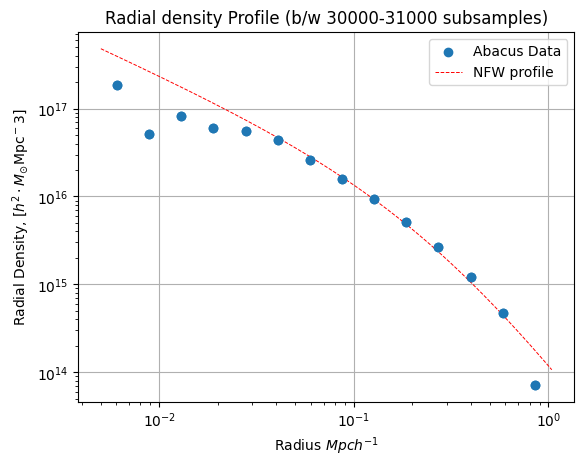

In [48]:
def rad_density_function(rad_list, particle_mass, b,z, part_numb,so_radius):

    min_rad=[]
    max_rad=[]
    for i in range(len(rad_list)):
        if np.max(rad_list[i])>so_radius[i]:
            max=so_radius[i]

            min = np.min(rad_list[i])
            #max=np.max(rad_list[i])
        min_rad.append(min)
        max_rad.append(max)

    bineq = np.logspace(np.log10(np.min(min_rad)-0.00001),np.log10(np.max(max_rad)+0.01),b)
    
    all_histogram=[]
    #freq=0
    freq = np.zeros(len(bineq) - 1)
    for i in range(len(rad_list)):
        frequency, bin_edge = np.histogram(rad_list[i], bins=bineq)
        freq+=frequency
        all_histogram.append(frequency)

        #print(frequency)
    error = np.std(all_histogram, axis=0)

    fraction= np.sum(part_numb)/np.sum(freq)

    volume=[]
    mass_point=[]
    for i in range(len(bineq)-1):
        vol = (4/3)*np.pi*(bineq[i+1]**3-bineq[i]**3)
        mass_pt =  (bineq[i+1]*bineq[i])**(1/2)
        volume.append(vol)
        mass_point.append(mass_pt)

    density = ((freq*particle_mass)/(volume))*fraction
    avg_density = density/len(part_numb)
    

    radial_density_comoving= ((1+z)**3)* np.array(avg_density)

    
    plt.loglog()
    plt.errorbar(mass_point, radial_density_comoving,yerr=error,fmt='o', capsize=3)
    
    
    plt.scatter(mass_point,radial_density_comoving,label='Abacus Data')
    
    

def radial_density_prof_halomod(part_numb, part_mass, radius,r100,z,SOdensityL1):
    h=0.6736
    Ob0 = 0.02237/h**2
    Om0 = 0.315192
    n_s = 0.9649
    sigma_8 = 0.807952

    hm=DMHaloModel(cosmo_model=Planck18,cosmo_params={'Om0':Om0, 'H0':h*100, 'Ob0':Ob0},n=n_s,sigma_8=sigma_8 , z=z,
               mdef_model=mass_definitions.SOMean,mdef_params={'overdensity':SOdensityL1},halo_profile_model='NFWInf',halo_concentration_model='Ludlow16')
    #print(TracerHaloModel.parameter_info())

    min_rad=[]
    max_rad=[]
    for i in range(len(radius)):
        min = np.min(radius[i])
        max=np.max(radius[i])
        min_rad.append(min)
        max_rad.append(max)

    r = np.logspace(np.log10(np.min(min_rad)-0.00001), np.log10(np.max(r100)+0.001), 1000)
    indices = np.argsort(r)

    total_mass=0
    for i in range(len(part_numb)):
        total_mass+= part_numb[i]*part_mass
    avg_mass=total_mass/len(part_numb)

    rad_density_halomod = hm.halo_profile.rho(r=r[indices], m=avg_mass)

    plt.loglog()

    plt.plot(r[indices], rad_density_halomod,'--',lw=0.7,label='NFW profile',color='red')

rad_density_function(ra, particle_mass, b,z,particle_number,so_radius)
radial_density_prof_halomod(particle_number, particle_mass,ra,r100,z,SOdensityL1)


plt.title(f'Radial density Profile (b/w {halo_min}-{halo_max} subsamples)')
plt.xlabel('Radius $Mpc h^{-1}$')
plt.ylabel(r'Radial Density, $[h^2\cdot M_{\odot}\text{Mpc}^-3]$')
plt.grid()
plt.legend()
#plt.savefig('rad_fig.csv')
plt.show()
